In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
#import Data
xl = pd.ExcelFile('Dry_Bean_Dataset.xlsx')
df = xl.parse(xl.sheet_names[0])
print(df.shape)
print(df.head(5).T)

(13611, 17)
                          0           1           2           3           4
Area                  28395       28734       29380       30008       30140
Perimeter           610.291     638.018      624.11     645.884     620.134
MajorAxisLength  208.178117  200.524796   212.82613  210.557999  201.847882
MinorAxisLength  173.888747  182.734419  175.931143  182.516516  190.279279
AspectRation       1.197191    1.097356    1.209713    1.153638    1.060798
Eccentricity       0.549812    0.411785    0.562727    0.498616     0.33368
ConvexArea            28715       29172       29690       30724       30417
EquivDiameter    190.141097   191.27275  193.410904  195.467062  195.896503
Extent             0.763923    0.783968    0.778113    0.782681    0.773098
Solidity           0.988856    0.984986    0.989559    0.976696    0.990893
roundness          0.958027    0.887034    0.947849    0.903936    0.984877
Compactness        0.913358    0.953861    0.908774    0.928329    0.970516


In [21]:
X=df.drop('Class',axis =1).values
y = df['Class'].values
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


<AxesSubplot:>

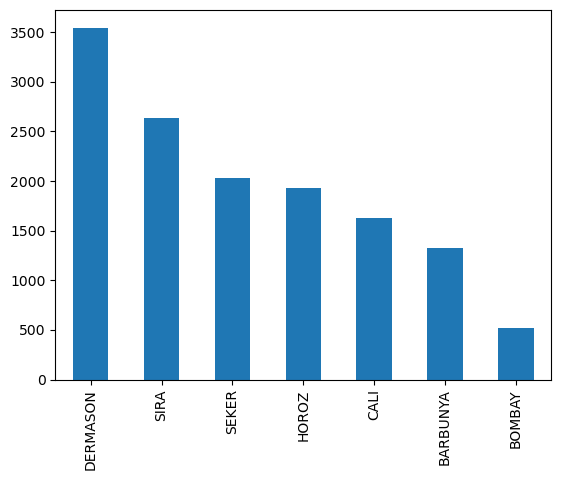

In [45]:
print(df['Class'].unique())
print(df['Class'].value_counts())
df['Class'].value_counts().plot.bar()

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(len(df['Class'].value_counts()))

7


In [76]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9119, 16)
(9119,)
(4492, 16)
(4492,)


In [77]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

/var/folders/jw/0j27hm_n76b6bxglkkkpgq300000gp/T/ipykernel_19653/2310471181.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
/var/folders/jw/0j27hm_n76b6bxglkkkpgq300000gp/T/ipykernel_19653/2310471181.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transfo

In [78]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train[:2])

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [79]:
# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [80]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [81]:
history = model.fit(x=X_train,y=y_train, validation_split=0.2,
          batch_size=128,epochs=100)


Epoch 1/100
57/57 [==============================] - 1s 4ms/step - loss: 1.5459 - accuracy: 0.3593 - val_loss: 1.1416 - val_accuracy: 0.4709
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.8646 - accuracy: 0.6520 - val_loss: 0.6449 - val_accuracy: 0.7681
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8555 - val_loss: 0.3145 - val_accuracy: 0.9046
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.9084 - val_loss: 0.2616 - val_accuracy: 0.9090
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9162 - val_loss: 0.2400 - val_accuracy: 0.9150
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9209 - val_loss: 0.2392 - val_accuracy: 0.9172
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9216 - val_loss: 0.2144 - val_accuracy: 0.9211
Epoch 8/100
5

Epoch 59/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9397 - val_loss: 0.1941 - val_accuracy: 0.9287
Epoch 60/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9375 - val_loss: 0.1971 - val_accuracy: 0.9271
Epoch 61/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9405 - val_loss: 0.1960 - val_accuracy: 0.9265
Epoch 62/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9389 - val_loss: 0.2072 - val_accuracy: 0.9276
Epoch 63/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9380 - val_loss: 0.1969 - val_accuracy: 0.9271
Epoch 64/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9389 - val_loss: 0.1966 - val_accuracy: 0.9276
Epoch 65/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9364 - val_loss: 0.2023 - val_accuracy: 0.9254
Epoch 

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                544       
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 7)                 119       
                                                                 
Total params: 3,303
Trainable params: 3,303
Non-trainable params: 0
_________________________________________________________________


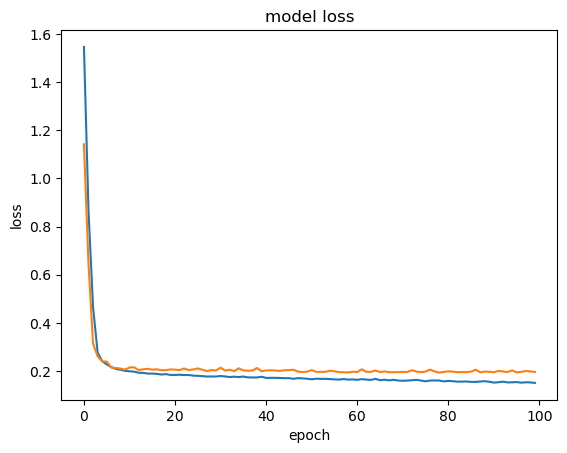

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [84]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

141/141 [==============================] - 0s 784us/step


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       400
           1       0.99      1.00      1.00       185
           2       0.95      0.93      0.94       531
           3       0.92      0.93      0.92      1163
           4       0.97      0.93      0.95       642
           5       0.95      0.95      0.95       675
           6       0.87      0.88      0.88       896

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

